# Mastering Maze Search - BFS, Dijkstra, A* Algorithms Explained

### Sudip Das

### Import the necessary libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
import time
%matplotlib inline

### Build the maze from txt file

In [5]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

### Builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left)

In [10]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

### Breadth First Search (BFS)

In [20]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
    

### A* search (A-star)

In [21]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, W, heuristic):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze2[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W* heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
  

### Dijkstra Algorithm

In [17]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != start_node: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(start_node) 
    path.reverse() 
    return previous_nodes, path

#visited nodes - mark them as -3 in maze numpy array 
#path - mark them as -1 in maze numpy array

### Plots the searched maze and colors search space, path and unvisited nodes

In [18]:
def plot_searched_graph(maze, came_from, path, start, goal):
    
    for i in came_from:
        maze[i[0],i[1]]=-3
    for i in path:
        maze[i[0],i[1]]=-1

    plt.imshow(maze, cmap='Pastel2')
    plt.plot(start[1], start[0], 'o', color='red', markersize=7, label='Start')
    plt.plot(goal[1], goal[0], 'o', color='green', markersize=7, label='Goal')
    for (y, x) in path:
        plt.plot(x, y, marker='o', color='blue', markersize=4)
    
    plt.legend()
    plt.show()

#gray cells - the walls of the maze
#dark green cells - the visited cells of the maze
#blue dots - the path taken
#orange/light brown - the unvisited cells of the maze

### Visualize the maze

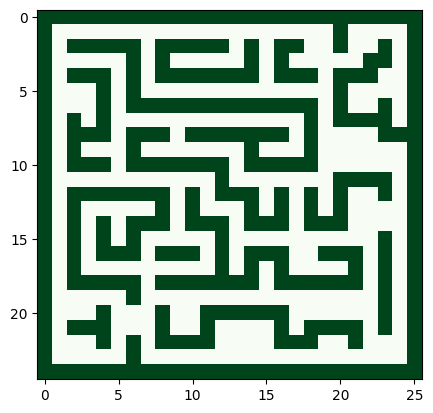

In [19]:
START25=(1, 1)
GOAL25=(22, 22)
maze_file2 = "my_maze_25X25.txt"
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
plt.imshow(build_maze("my_maze_25X25.txt"), cmap='Greens')

### Euclidean distance

In [23]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2 )**0.5



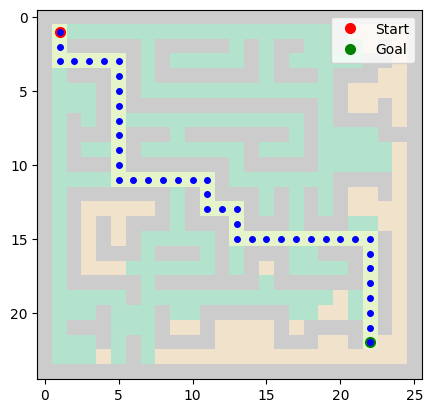

Path length: 43
Search Space: 247
Time Taken: 0.0005629062652587891


In [26]:
#Euclidean with W=1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e1, path_e1 = astar_path(graph, START25, GOAL25, 1, Euclidean_distance)
end_time = time.time()
e_time1 = end_time - start_time

plot_searched_graph(maze2, came_from_e1, path_e1, START25, GOAL25)
print('Path length:', len(path_e1))
print('Search Space:',len(came_from_e1))
print('Time Taken:',e_time1)

### Manhattan distance

In [24]:
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])

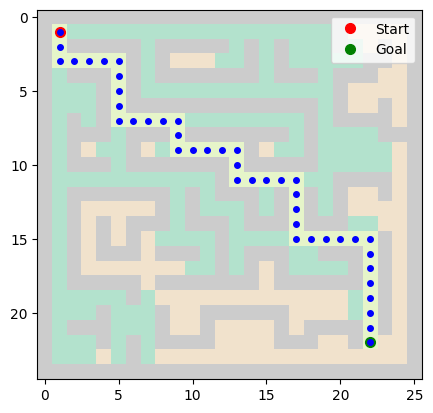

Path length: 43
Search Space: 218
Time Taken: 0.0007991790771484375


In [94]:
#Manhattan with W=1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m1, path_m1 = astar_path(graph, START25, GOAL25, 1, Manhattan_distance)
end_time = time.time()
m_time1 = end_time - start_time

plot_searched_graph(maze2, came_from_m1, path_m1, START25, GOAL25)
print('Path length:', len(path_m1))
print('Search Space:',len(came_from_m1))
print('Time Taken:',m_time1)

### Effects of Weight


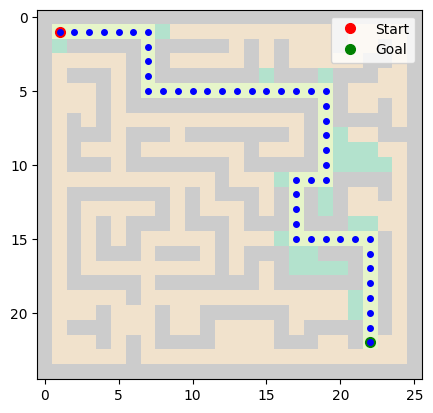

Path length: 47
Search Space: 73
Time Taken: 0.00036406517028808594


In [104]:
#Euclidean with W=5
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e5, path_e5 = astar_path(graph, START25, GOAL25, 5, Euclidean_distance)
end_time = time.time()
e_time5 = end_time - start_time

plot_searched_graph(maze2, came_from_e5, path_e5, START25, GOAL25)
print('Path length:', len(path_e5))
print('Search Space:',len(came_from_e5))
print('Time Taken:',e_time5)

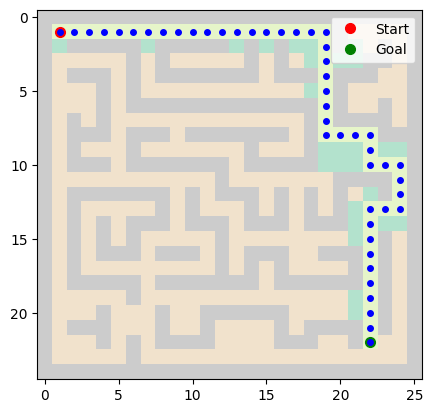

Path length: 47
Search Space: 74
Time Taken: 0.0003552436828613281


In [96]:
#Manhattan with W=5
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m5, path_m5 = astar_path(graph, START25, GOAL25, 5, Manhattan_distance)
end_time = time.time()
m_time5 = end_time - start_time

plot_searched_graph(maze2, came_from_m5, path_m5, START25, GOAL25)
print('Path length:', len(path_m5))
print('Search Space:',len(came_from_m5))
print('Time Taken:',m_time5)

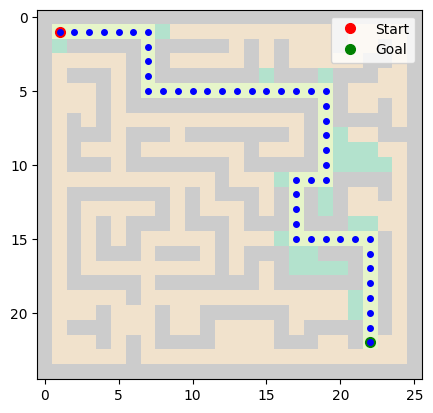

Path length: 47
Search Space: 73
Time Taken: 0.00034618377685546875


In [105]:
#Euclidean with W=15
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e15, path_e15 = astar_path(graph, START25, GOAL25, 15, Euclidean_distance)
end_time = time.time()
e_time15 = end_time - start_time

plot_searched_graph(maze2, came_from_e15, path_e15, START25, GOAL25)
print('Path length:', len(path_e15))
print('Search Space:',len(came_from_e15))
print('Time Taken:',e_time15)

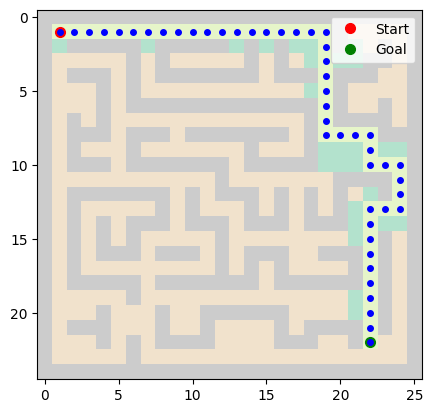

Path length: 47
Search Space: 74
Time Taken: 0.0003399848937988281


In [98]:
#Manhattan with W=15
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m15, path_m15 = astar_path(graph, START25, GOAL25, 15, Manhattan_distance)
end_time = time.time()
m_time15 = end_time - start_time

plot_searched_graph(maze2, came_from_m15, path_m15, START25, GOAL25)
print('Path length:', len(path_m15))
print('Search Space:',len(came_from_m15))
print('Time Taken:',m_time15)

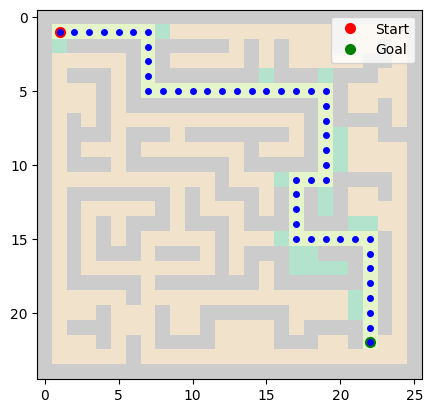

Path length: 47
Search Space: 68
Time Taken: 0.0002789497375488281


In [106]:
#Euclidean with W=40
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e40, path_e40 = astar_path(graph, START25, GOAL25, 40, Euclidean_distance)
end_time = time.time()
e_time40 = end_time - start_time

plot_searched_graph(maze2, came_from_e40, path_e40, START25, GOAL25)
print('Path length:', len(path_e40))
print('Search Space:',len(came_from_e40))
print('Time Taken:',e_time40)

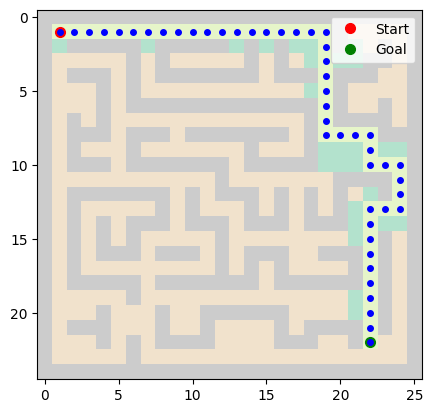

Path length: 47
Search Space: 74
Time Taken: 0.0002689361572265625


In [100]:
#Manhattan with W=40
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m40, path_m40 = astar_path(graph, START25, GOAL25, 40, Manhattan_distance)
end_time = time.time()
m_time40 = end_time - start_time

plot_searched_graph(maze2, came_from_m40, path_m40, START25, GOAL25)
print('Path length:', len(path_m40))
print('Search Space:',len(came_from_m40))
print('Time Taken:',m_time40)

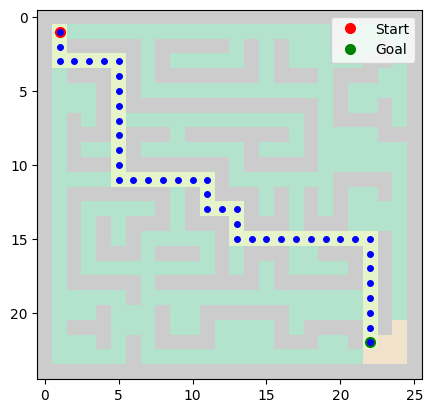

Path length: 43
Search Space: 328
Time Taken: 0.0009829998016357422


In [108]:
#Euclidean with W=0.1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e01, path_e01 = astar_path(graph, START25, GOAL25, 0.1, Euclidean_distance)
end_time = time.time()
e_time01 = end_time - start_time

plot_searched_graph(maze2, came_from_e01, path_e01, START25, GOAL25)
print('Path length:', len(path_e01))
print('Search Space:',len(came_from_e01))
print('Time Taken:',e_time01)

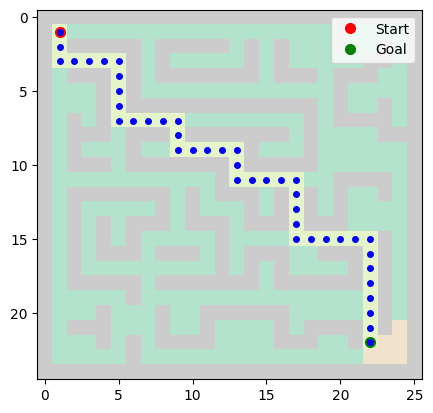

Path length: 43
Search Space: 328
Time Taken: 0.0008292198181152344


In [102]:
#Manhattan with W=0.1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m01, path_m01 = astar_path(graph, START25, GOAL25, 0.1, Manhattan_distance)
end_time = time.time()
m_time01 = end_time - start_time

plot_searched_graph(maze2, came_from_m01, path_m01, START25, GOAL25)
print('Path length:', len(path_m01))
print('Search Space:',len(came_from_m01))
print('Time Taken:',m_time01)

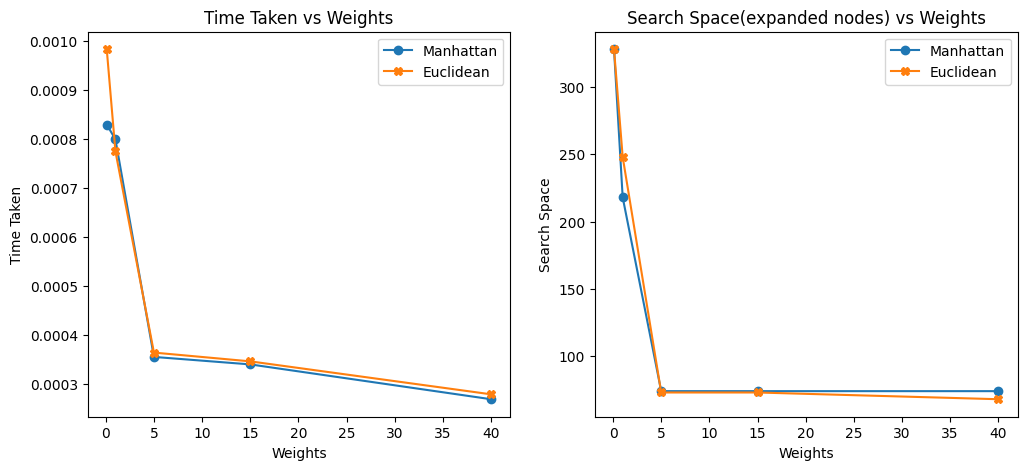

In [111]:
weights = [0.1, 1, 5, 15, 40]
time_taken_manhattan = [m_time01, m_time1, m_time5, m_time15, m_time40]
time_taken_euclidean = [e_time01, e_time1, e_time5, e_time15, e_time40] 
search_space_manhattan = [len(came_from_m01), len(came_from_m1), len(came_from_m5), len(came_from_m15), len(came_from_m40)]
search_space_euclidean = [len(came_from_e01), len(came_from_e1), len(came_from_e5), len(came_from_e15), len(came_from_e40)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting time taken vs weights
ax[0].plot(weights, time_taken_manhattan, label='Manhattan', marker='o')
ax[0].plot(weights, time_taken_euclidean, label='Euclidean', marker='X')
ax[0].set_title('Time Taken vs Weights')
ax[0].set_xlabel('Weights')
ax[0].set_ylabel('Time Taken')
ax[0].legend()

# Plotting expanded nodes vs weights
ax[1].plot(weights, search_space_manhattan, label='Manhattan', marker='o')
ax[1].plot(weights, search_space_euclidean, label='Euclidean', marker='X')
ax[1].set_title('Search Space(expanded nodes) vs Weights')
ax[1].set_xlabel('Weights')
ax[1].set_ylabel('Search Space')
ax[1].legend()

plt.show()

### Dijkstra Solution

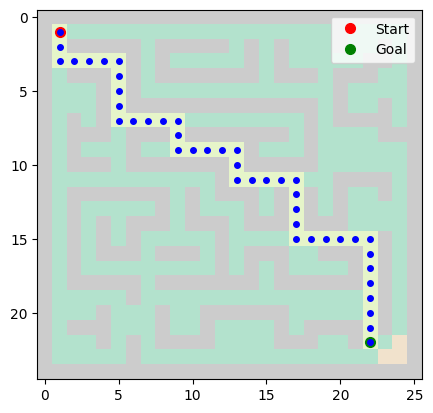

Shortest Path length: 43
Search Space: 330
Time Taken: 0.009308099746704102


In [114]:
#Shortest path using Dijkstra
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
previous_nodes, path = dijkstra_algorithm(graph, START25, GOAL25)
end_time = time.time()

plot_searched_graph(maze2, previous_nodes, path, START25, GOAL25)
print('Shortest Path length:', len(path))
print('Search Space:',len(previous_nodes))
print('Time Taken:',end_time - start_time)

### BFS Solution

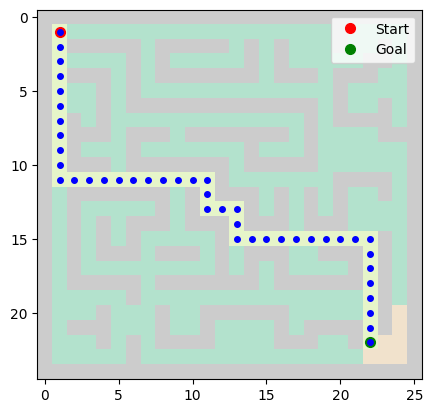

Shortest Path length: 43
Search Space: 326
Time Taken: 0.0005590915679931641


In [116]:
#Shortest path using BFS
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
visited, path = BreadthFirst(graph, START25, GOAL25)
end_time = time.time()

plot_searched_graph(maze2, visited, path, START25, GOAL25)
print('Shortest Path length:', len(path))
print('Search Space:',len(visited))
print('Time Taken:',end_time - start_time)

### Comparison of Each Algorithm

In [120]:
# 3 random start and goal states
START_state1 = (5,12)
GOAL_state1 = (23, 10)

START_state2 = (18,7)
GOAL_state2 = (1, 15)

START_state3 = (9,8)
GOAL_state3 = (21, 14)

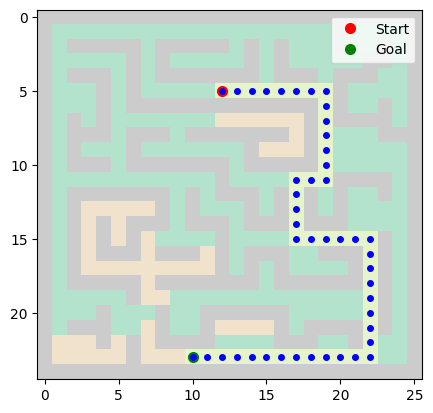

Path length: 45
Search Space: 281
Time Taken: 0.0006330013275146484


In [182]:
#Euclidean with W=1, State 1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e_s1, path_e_s1 = astar_path(graph, START_state1, GOAL_state1, 1, Euclidean_distance)
end_time = time.time()
e_time_s1 = end_time - start_time

plot_searched_graph(maze2, came_from_e_s1, path_e_s1, START_state1, GOAL_state1)
print('Path length:', len(path_e_s1))
print('Search Space:',len(came_from_e_s1))
print('Time Taken:',e_time_s1)

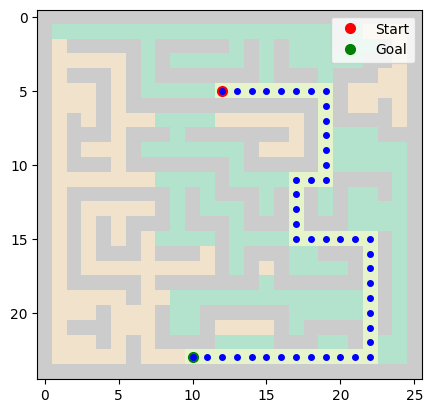

Path length: 45
Search Space: 208
Time Taken: 0.00048828125


In [177]:
#Manhattan with W=1, State 1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m_s1, path_m_s1 = astar_path(graph, START_state1, GOAL_state1, 1, Manhattan_distance)
end_time = time.time()
m_time_s1 = end_time - start_time

plot_searched_graph(maze2, came_from_m_s1, path_m_s1, START_state1, GOAL_state1)
print('Path length:', len(path_m_s1))
print('Search Space:',len(came_from_m_s1))
print('Time Taken:',m_time_s1)

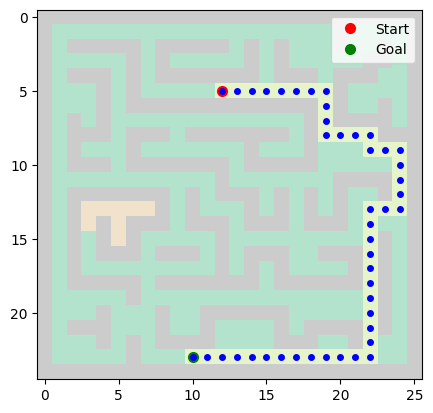

Shortest Path length: 45
Search Space: 325
Time Taken: 0.006642818450927734


In [134]:
#Shortest path using Dijkstra, State 1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
previous_nodes_s1, path_dij_s1 = dijkstra_algorithm(graph, START_state1, GOAL_state1)
end_time = time.time()
dij_time_s1 = end_time - start_time

plot_searched_graph(maze2, previous_nodes_s1, path_dij_s1, START_state1, GOAL_state1)
print('Shortest Path length:', len(path_dij_s1))
print('Search Space:',len(previous_nodes_s1))
print('Time Taken:',end_time - start_time)

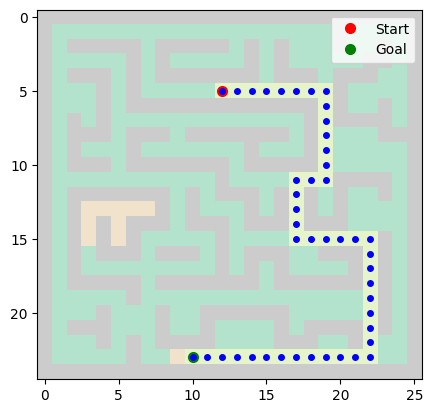

Shortest Path length: 45
Search Space: 323
Time Taken: 0.0008111000061035156


In [172]:
#Shortest Path using BFS, State 1
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
visited_s1, path_bfs_s1 = BreadthFirst(graph, START_state1, GOAL_state1)
end_time = time.time()
bfs_time_s1 = end_time - start_time

plot_searched_graph(maze2, visited, path_bfs_s1, START_state1, GOAL_state1)
print('Shortest Path length:', len(path_bfs_s1))
print('Search Space:',len(visited_s1))
print('Time Taken:',end_time - start_time)

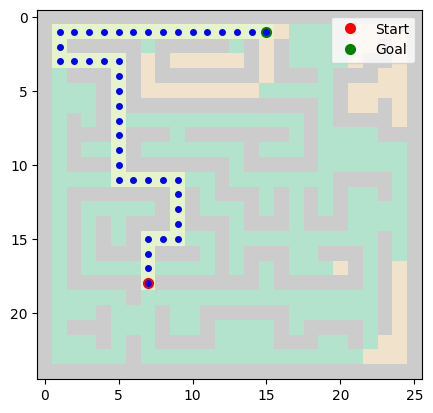

Path length: 42
Search Space: 285
Time Taken: 0.0010361671447753906


In [174]:
#Euclidean with W=1, State 2
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e_s2, path_e_s2 = astar_path(graph, START_state2, GOAL_state2, 1, Euclidean_distance)
end_time = time.time()
e_time_s2 = end_time - start_time

plot_searched_graph(maze2, came_from_e_s2, path_e_s2, START_state2, GOAL_state2)
print('Path length:', len(path_e_s2))
print('Search Space:',len(came_from_e_s2))
print('Time Taken:',e_time_s2)

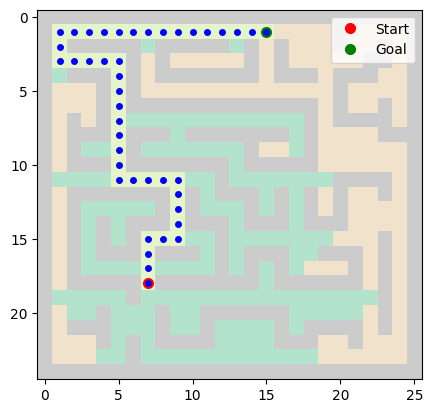

Path length: 42
Search Space: 191
Time Taken: 0.00020694732666015625


In [126]:
#Manhattan with W=1, State 2
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m_s2, path_m_s2 = astar_path(graph, START_state2, GOAL_state2, 1, Manhattan_distance)
end_time = time.time()
m_time_s2 = end_time - start_time

plot_searched_graph(maze2, came_from_m_s2, path_m_s2, START_state2, GOAL_state2)
print('Path length:', len(path_m_s2))
print('Search Space:',len(came_from_m_s2))
print('Time Taken:',m_time_s2)

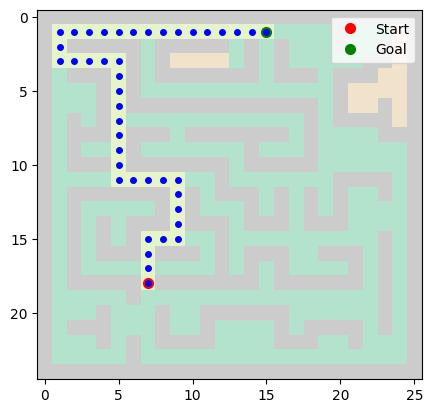

Shortest Path length: 42
Search Space: 316
Time Taken: 0.0077991485595703125


In [137]:
#Shortest path using Dijkstra, State 2
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
previous_nodes_s2, path_dij_s2 = dijkstra_algorithm(graph, START_state2, GOAL_state2)
end_time = time.time()
dij_time_s2 = end_time - start_time

plot_searched_graph(maze2, previous_nodes_s2, path_dij_s2, START_state2, GOAL_state2)
print('Shortest Path length:', len(path_dij_s2))
print('Search Space:',len(previous_nodes_s2))
print('Time Taken:',end_time - start_time)

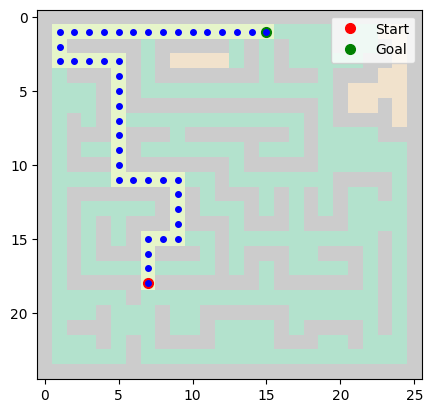

Shortest Path length: 42
Search Space: 315
Time Taken: 0.0011167526245117188


In [145]:
#Shortest Path using BFS, State 2
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
visited_s2, path_bfs_s2 = BreadthFirst(graph, START_state2, GOAL_state2)
end_time = time.time()
bfs_time_s2 = end_time - start_time

plot_searched_graph(maze2, visited_s2, path_bfs_s2, START_state2, GOAL_state2)
print('Shortest Path length:', len(path_bfs_s2))
print('Search Space:',len(visited_s2))
print('Time Taken:',end_time - start_time)

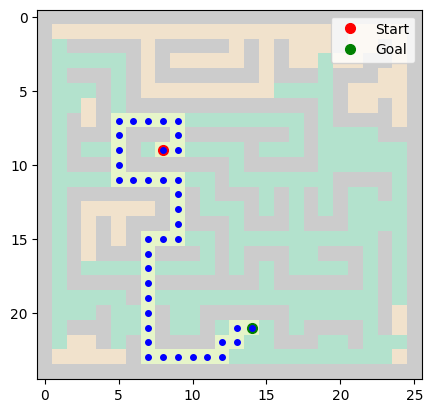

Path length: 39
Search Space: 247
Time Taken: 0.0008039474487304688


In [192]:
#Euclidean with W=1, State 3
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_e_s3, path_e_s3 = astar_path(graph, START_state3, GOAL_state3, 1, Euclidean_distance)
end_time = time.time()
e_time_s3 = end_time - start_time

plot_searched_graph(maze2, came_from_e_s3, path_e_s3, START_state3, GOAL_state3)
print('Path length:', len(path_e_s3))
print('Search Space:',len(came_from_e_s3))
print('Time Taken:',e_time_s3)

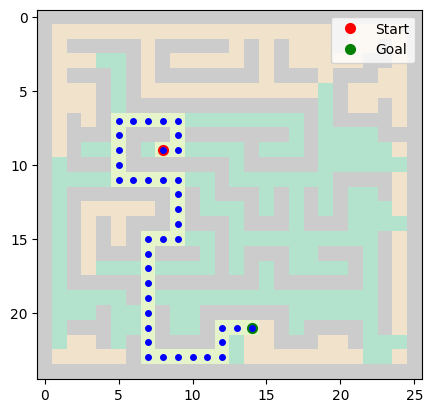

Path length: 39
Search Space: 206
Time Taken: 0.0007390975952148438


In [190]:
#Manhattan with W=1, State 3
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
came_from_m_s3, path_m_s3 = astar_path(graph, START_state3, GOAL_state3, 1, Manhattan_distance)
end_time = time.time()
m_time_s3 = end_time - start_time

plot_searched_graph(maze2, came_from_m_s3, path_m_s3, START_state3, GOAL_state3)
print('Path length:', len(path_m_s3))
print('Search Space:',len(came_from_m_s3))
print('Time Taken:',m_time_s3)

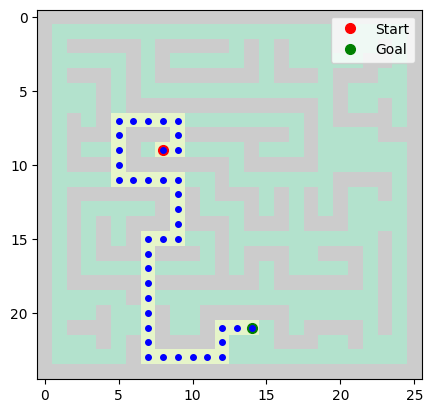

Shortest Path length: 39
Search Space: 333
Time Taken: 0.009886980056762695


In [139]:
#Shortest path using Dijkstra, State 3
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
previous_nodes_s3, path_dij_s3 = dijkstra_algorithm(graph, START_state3, GOAL_state3)
end_time = time.time()
dij_time_s3 = end_time - start_time

plot_searched_graph(maze2, previous_nodes_s3, path_dij_s3, START_state3, GOAL_state3)
print('Shortest Path length:', len(path_dij_s3))
print('Search Space:',len(previous_nodes_s3))
print('Time Taken:',end_time - start_time)

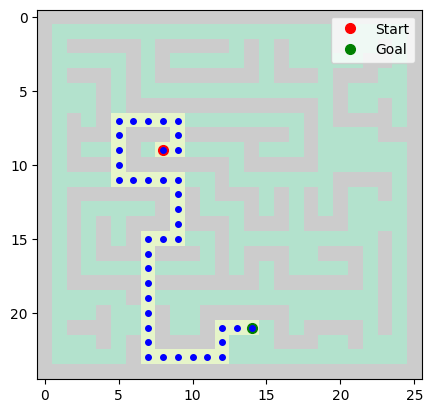

Shortest Path length: 39
Search Space: 333
Time Taken: 0.0019299983978271484


In [154]:
#Shortest Path using BFS, State 3
maze2 = build_maze(maze_file2)
graph = Find_the_edges(maze2)
start_time = time.time()
visited_s3, path_bfs_s3 = BreadthFirst(graph, START_state3, GOAL_state3)
end_time = time.time()
bfs_time_s3 = end_time - start_time

plot_searched_graph(maze2, visited_s3, path_bfs_s3, START_state3, GOAL_state3)
print('Shortest Path length:', len(path_bfs_s3))
print('Search Space:',len(visited_s3))
print('Time Taken:',end_time - start_time)

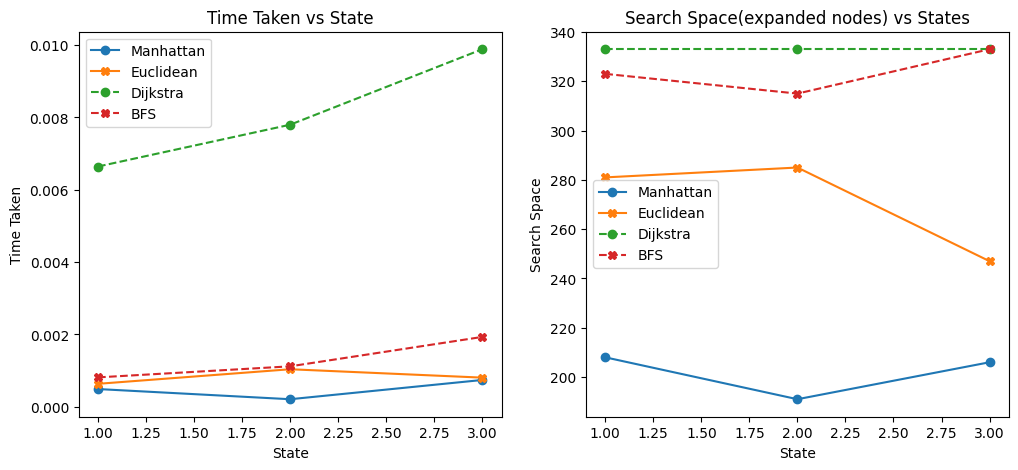

In [193]:
states = [1, 2, 3]
time_taken_manhattan = [m_time_s1, m_time_s2, m_time_s3]
time_taken_euclidean = [e_time_s1, e_time_s2, e_time_s3]
time_taken_dijkstra = [dij_time_s1, dij_time_s2, dij_time_s3]
time_taken_bfs = [bfs_time_s1, bfs_time_s2, bfs_time_s3]
search_space_manhattan = [len(came_from_m_s1), len(came_from_m_s2), len(came_from_m_s3)]
search_space_euclidean = [len(came_from_e_s1), len(came_from_e_s2), len(came_from_e_s3)]
search_space_dijkstra = [len(previous_nodes_s3), len(previous_nodes_s3), len(previous_nodes_s3)]
search_space_bfs = [len(visited_s1), len(visited_s2), len(visited_s3)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting time taken vs State
ax[0].plot(states, time_taken_manhattan, label='Manhattan', marker='o')
ax[0].plot(states, time_taken_euclidean, label='Euclidean', marker='X')
ax[0].plot(states, time_taken_dijkstra, label='Dijkstra', marker='o', linestyle='--')
ax[0].plot(states, time_taken_bfs, label='BFS', marker='X', linestyle='--')
ax[0].set_title('Time Taken vs State')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Time Taken')
ax[0].legend()

# Plotting expanded nodes vs weights
ax[1].plot(states, search_space_manhattan, label='Manhattan', marker='o')
ax[1].plot(states, search_space_euclidean, label='Euclidean', marker='X')
ax[1].plot(states, search_space_dijkstra, label='Dijkstra', marker='o', linestyle='--')
ax[1].plot(states, search_space_bfs, label='BFS', marker='X', linestyle='--')
ax[1].set_title('Search Space(expanded nodes) vs States')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Search Space')
ax[1].legend()

plt.show()

### Optimizing Maze Search with Diagonal Navigation

In [27]:
def Find_the_edges_diagonal(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))

                # Diagonal movement added
                if i - 1 >= 0 and j - 1 >= 0:
                    eles.append((i-1, j-1))
                if i - 1 >= 0 and j + 1 < grid_size:
                    eles.append((i-1, j+1))
                if i + 1 < grid_size and j - 1 >= 0:
                    eles.append((i+1, j-1))
                if i + 1 < grid_size and j + 1 < grid_size:
                    eles.append((i+1, j+1))
                
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

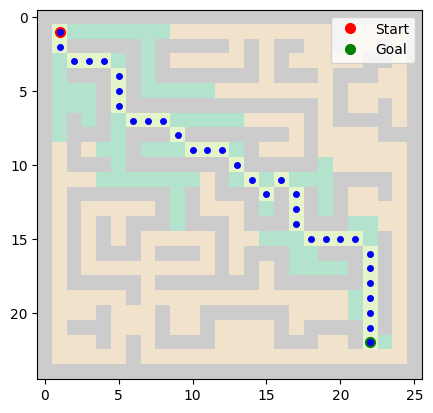

Path length: 33
Search Space: 108
Time Taken: 0.0002970695495605469


In [29]:
#Euclidean with W=1, diagonal movement allowed
maze2 = build_maze(maze_file2)
graph = Find_the_edges_diagonal(maze2)
start_time = time.time()
came_from_e, path_e = astar_path(graph, START25, GOAL25, 1, Euclidean_distance)
end_time = time.time()
e_time = end_time - start_time

plot_searched_graph(maze2, came_from_e, path_e, START25, GOAL25)
print('Path length:', len(path_e))
print('Search Space:',len(came_from_e))
print('Time Taken:',e_time)

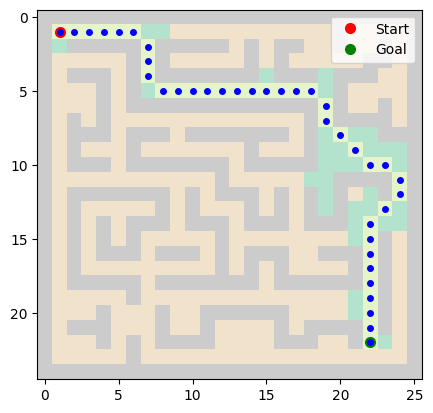

Path length: 38
Search Space: 72
Time Taken: 0.0002181529998779297


In [33]:
#Manhattan with W=1, diagonal
maze2 = build_maze(maze_file2)
graph = Find_the_edges_diagonal(maze2)
start_time = time.time()
came_from_m, path_m = astar_path(graph, START25, GOAL25, 1, Manhattan_distance)
end_time = time.time()
m_time = end_time - start_time

plot_searched_graph(maze2, came_from_m, path_m, START25, GOAL25)
print('Path length:', len(path_m))
print('Search Space:',len(came_from_m))
print('Time Taken:',m_time)

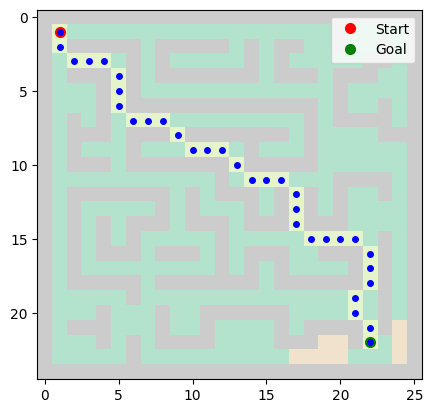

Shortest Path length: 33
Search Space: 323


In [31]:
#Shortest path using Dijkstra
maze2 = build_maze(maze_file2)
graph = Find_the_edges_diagonal(maze2)
previous_nodes_diag, path_diag = dijkstra_algorithm(graph, START25, GOAL25)

plot_searched_graph(maze2, previous_nodes_diag, path_diag, START25, GOAL25)
print('Shortest Path length:', len(path_diag))
print('Search Space:',len(previous_nodes_diag))

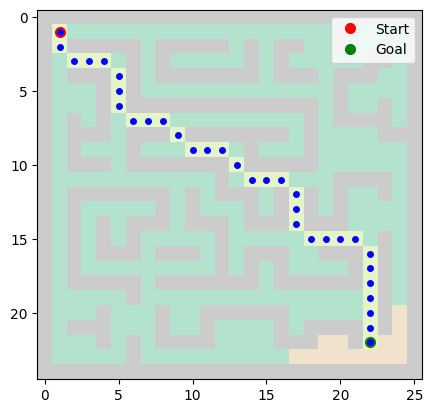

Shortest Path length: 33
Search Space: 318


In [32]:
#Shortest path using BFS
maze2 = build_maze(maze_file2)
graph = Find_the_edges_diagonal(maze2)
visited_diag, path_dgn = BreadthFirst(graph, START25, GOAL25)

plot_searched_graph(maze2, visited_diag, path_dgn, START25, GOAL25)
print('Shortest Path length:', len(path_dgn))
print('Search Space:',len(visited_diag))